In [3]:
from process_CSL import * 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Representation density plotting
1. Load the file labels 
  - Check the number of glosses and compare the number of frames 
  - divide the frames accordingly and label them according to that gloss in a dictionary

2. Load the embeddings and perform PCA or t-SNE 
  - Can choose to do so in samples sizes and then plot them accordingly

In [4]:
'''
Loading the labels
'''

def read_CSL_annotations(CSL_annot_path):
    with open(CSL_annot_path, 'rb') as f:
        data = pickle.load(f)
    return data

## Reading in the labelled annotations
train_labels = read_CSL_annotations("../../CSL-Daily/sentence_label/processed/labels_train.pkl") 
dev_labels = read_CSL_annotations("../../CSL-Daily/sentence_label/processed/labels_dev.pkl")
test_labels = read_CSL_annotations("../../CSL-Daily/sentence_label/processed/labels_test.pkl")
combined_labels = read_CSL_annotations("../../CSL-Daily/sentence_label/csl2020ct_v2.pkl")

In [5]:
train_labels

{'info': [{'name': 'S000000_P0000_T00', 'translation': '你们好！', 'length': 52},
  {'name': 'S000000_P0004_T00', 'translation': '你们好！', 'length': 47},
  {'name': 'S000000_P0008_T00', 'translation': '你们好！', 'length': 58},
  {'name': 'S000001_P0000_T00', 'translation': '对不起！', 'length': 37},
  {'name': 'S000001_P0004_T00', 'translation': '对不起！', 'length': 33},
  {'name': 'S000001_P0008_T00', 'translation': '对不起！', 'length': 45},
  {'name': 'S000002_P0000_T00', 'translation': '没关系！', 'length': 29},
  {'name': 'S000002_P0004_T00', 'translation': '没关系！', 'length': 35},
  {'name': 'S000002_P0008_T00', 'translation': '没关系！', 'length': 49},
  {'name': 'S000003_P0000_T00', 'translation': '谢谢！', 'length': 30},
  {'name': 'S000003_P0004_T00', 'translation': '谢谢！', 'length': 32},
  {'name': 'S000003_P0008_T00', 'translation': '谢谢！', 'length': 35},
  {'name': 'S000004_P0000_T00', 'translation': '不客气！', 'length': 51},
  {'name': 'S000004_P0004_T00', 'translation': '不客气！', 'length': 41},
  {'name': 'S00

In [6]:
dev_labels

{'info': [{'name': 'S000020_P0000_T00', 'translation': '他今年四岁。', 'length': 54},
  {'name': 'S000020_P0008_T00', 'translation': '他今年四岁。', 'length': 90},
  {'name': 'S000040_P0000_T00', 'translation': '今天星期几？', 'length': 41},
  {'name': 'S000040_P0004_T00', 'translation': '今天星期几？', 'length': 42},
  {'name': 'S000054_P0000_T00', 'translation': '今天我想吃面条。', 'length': 56},
  {'name': 'S000153_P0004_T00', 'translation': '你和小张什么时候认识的？', 'length': 55},
  {'name': 'S000153_P0008_T00', 'translation': '你和小张什么时候认识的？', 'length': 109},
  {'name': 'S000185_P0000_T00', 'translation': '我要去超市买椅子，你去吗？', 'length': 91},
  {'name': 'S000195_P0000_T00', 'translation': '他们下午要做什么？', 'length': 49},
  {'name': 'S000195_P0008_T00', 'translation': '他们下午要做什么？', 'length': 84},
  {'name': 'S000196_P0000_T00', 'translation': '他们想什么时候去买椅子？', 'length': 79},
  {'name': 'S000196_P0004_T00', 'translation': '他们想什么时候去买椅子？', 'length': 90},
  {'name': 'S000201_P0004_T00', 'translation': '我每天六点起床。', 'length': 134},
  {'name': 'S

In [7]:
test_labels

{'info': [{'name': 'S000020_P0004_T00', 'translation': '他今年四岁。', 'length': 52},
  {'name': 'S000040_P0008_T00', 'translation': '今天星期几？', 'length': 66},
  {'name': 'S000054_P0008_T00', 'translation': '今天我想吃面条。', 'length': 93},
  {'name': 'S000153_P0000_T00', 'translation': '你和小张什么时候认识的？', 'length': 76},
  {'name': 'S000185_P0004_T00', 'translation': '我要去超市买椅子，你去吗？', 'length': 108},
  {'name': 'S000185_P0008_T00', 'translation': '我要去超市买椅子，你去吗？', 'length': 161},
  {'name': 'S000195_P0004_T00', 'translation': '他们下午要做什么？', 'length': 51},
  {'name': 'S000196_P0008_T00', 'translation': '他们想什么时候去买椅子？', 'length': 124},
  {'name': 'S000201_P0000_T00', 'translation': '我每天六点起床。', 'length': 79},
  {'name': 'S000213_P0004_T00', 'translation': '他每天回来都很累。', 'length': 71},
  {'name': 'S000213_P0008_T00', 'translation': '他每天回来都很累。', 'length': 115},
  {'name': 'S000218_P0004_T00', 'translation': '这块手表是你的吗？', 'length': 31},
  {'name': 'S000218_P0008_T00', 'translation': '这块手表是你的吗？', 'length': 60},
  {'nam

In [8]:
combined_labels

{'info': [{'name': 'S000000_P0000_T00',
   'length': 52,
   'label_gloss': ['你们', '好'],
   'label_char': ['你', '们', '好', '！'],
   'label_word': ['你们', '好', '！'],
   'label_postag': ['r', 'a', 'w'],
   'signer': 0,
   'time': 0},
  {'name': 'S000000_P0004_T00',
   'length': 47,
   'label_gloss': ['你们', '好'],
   'label_char': ['你', '们', '好', '！'],
   'label_word': ['你们', '好', '！'],
   'label_postag': ['r', 'a', 'w'],
   'signer': 4,
   'time': 0},
  {'name': 'S000000_P0008_T00',
   'length': 58,
   'label_gloss': ['你们', '好'],
   'label_char': ['你', '们', '好', '！'],
   'label_word': ['你们', '好', '！'],
   'label_postag': ['r', 'a', 'w'],
   'signer': 8,
   'time': 0},
  {'name': 'S000001_P0000_T00',
   'length': 37,
   'label_gloss': ['对不起'],
   'label_char': ['对', '不', '起', '！'],
   'label_word': ['对不起', '！'],
   'label_postag': ['v', 'w'],
   'signer': 0,
   'time': 0},
  {'name': 'S000001_P0004_T00',
   'length': 33,
   'label_gloss': ['对不起'],
   'label_char': ['对', '不', '起', '！'],
   'la

## Matching frames to gloss function

In [51]:
'''
Function to gather all the tensor .pt files from a specific folder name
1. Load the file labels 
  - Check the number of glosses and compare the number of frames 
  - divide the frames accordingly and label them according to that gloss in a dictionary
'''
def gather_vid_emb(name, phase, img_dir = "../../CSL-Daily/sentence/frames_512x512"): 
  vid_folder = os.path.join(img_dir, f"{phase}/{name}")
  #print("Getting video frames from ", vid_folder)

  #list all the files in the folder
  path_lst = os.listdir(vid_folder)
  # Keep those who are only .pt and sort them
  path_lst = sorted([f for f in path_lst if f.endswith('.pt')])
  #print(path_lst)
  # open all the files and keep the tensors in a list
  tensor_lst = [torch.load(os.path.join(vid_folder, f)) for f in path_lst]
  return tensor_lst

def get_gloss(combined_annotations, name): 
  # find entry in combined_annotations 
  entry = find_entry_by_name(combined_labels, name)
  gloss_entry = entry['label_gloss']
  return gloss_entry

def match_frames_w_gloss(tensor_lst, gloss): 
  # divide the frames into glosses
  num_tensors = len(tensor_lst)
  num_gloss = len(gloss)
  tensors_per_gloss = num_tensors//num_gloss

  # create a dictionary to hold the frames referring to a gloss
  gloss_dict = {}
  for i, g in enumerate(gloss):
    if i == num_gloss-1: 
      gloss_dict[g] = [tensor_lst[i*tensors_per_gloss:]]
    else: 
      gloss_dict[g] = [tensor_lst[i*tensors_per_gloss:(i+1)*tensors_per_gloss]]
  
  return gloss_dict
  
def find_and_combine_glossdicts(phase, num_samples = None , name_lst= None , dir="../../CSL-Daily/sentence/frames_512x512"):
  gloss_dict_lst = {}
  ## make assertions to prevent error 
  assert phase in ['train', 'dev', 'test'], "Phase must be either train, dev or test"
  assert num_samples is not None or name_lst is not None, "Either number of samples or name list must be provided"

  if name_lst is None:
    video_lst = os.listdir(f"{dir}/{phase}")
    # Sample random number of videos
    name_lst =  random.sample(video_lst, num_samples)

  ## Gather various gloss dicts 
  for name in name_lst: 
    gloss = get_gloss(combined_labels, name)
    tensor_lst = gather_vid_emb(name, phase)
    gloss_dict_lst[name] = match_frames_w_gloss(tensor_lst, gloss)

  # Comebine gloss dicts 
  combined_gloss_dict = {}
  for name in name_lst: 
    for k, v in gloss_dict_lst[name].items(): 
      if k in combined_gloss_dict: 
        combined_gloss_dict[k].extend(v)
      else: 
        combined_gloss_dict[k] = v
  return gloss_dict_lst, combined_gloss_dict



In [52]:
gloss_dict_lst , combined_gloss_dict = find_and_combine_glossdicts("train", num_samples = 100)

In [12]:
gloss_dict_lst

{'S000056_P0008_T00': {'下午': [[tensor([ 317, 1479, 1718, 3136, 1152,  394, 2134, 3043, 1119, 3368, 2896,  614,
            2457, 3004,  180, 2884, 1644, 3466, 2038, 1714, 2613, 2305, 3096, 2333,
            2308, 2335,  975, 2383,  364, 3326,   84, 3956]),
    tensor([1019, 1479, 2075, 1229, 1152, 3053, 1268,  511, 2453, 3368, 3500, 2785,
             266, 1931,  180, 3212, 1963, 1624, 4092, 1714,  923, 2254, 3951, 3518,
            1406, 1017, 1869, 3590,  568,  818, 2333, 3736]),
    tensor([1007, 2778,  436, 3136, 2875, 2350, 1268, 1453, 1143, 3240, 3500, 3870,
             266, 3004,  180,  224, 3530, 4093, 2038,  882, 2613, 2254, 3150, 2333,
             682, 2335,  975, 3009,  224, 3872,   84, 3956]),
    tensor([ 396,  163, 3831,  446, 2875, 1121, 3494,  768, 3166,  181, 2244, 2785,
             266, 1931,  180, 3034, 1963, 1624, 1553, 1714,  923, 2254,  194, 3518,
            1406, 2433, 1427, 3009,  568, 1391,   84, 3736]),
    tensor([3970, 2778, 2075, 2388, 1176,  394, 3330,

In [19]:
gloss_dict_lst['S002567_P0007_T00'].keys()

dict_keys(['做', '表格', '你', '会'])

In [63]:
np.array(combined_gloss_dict['信息']).squeeze().shape

(16, 32)

# Dimensionality reduction and plotting functions
2. Load the embeddings and perform PCA or t-SNE 
  - Can choose to do so in samples sizes and then plot them accordingly

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\mpl-data\matplotlibrc


C:\Users\User\AppData\Local\Temp\ipykernel_27444\1825186496.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))  # Use a color map for up to 10 glosses
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) KaiTi.
  fig.canvas.print_figure(bytes_io, **kw)


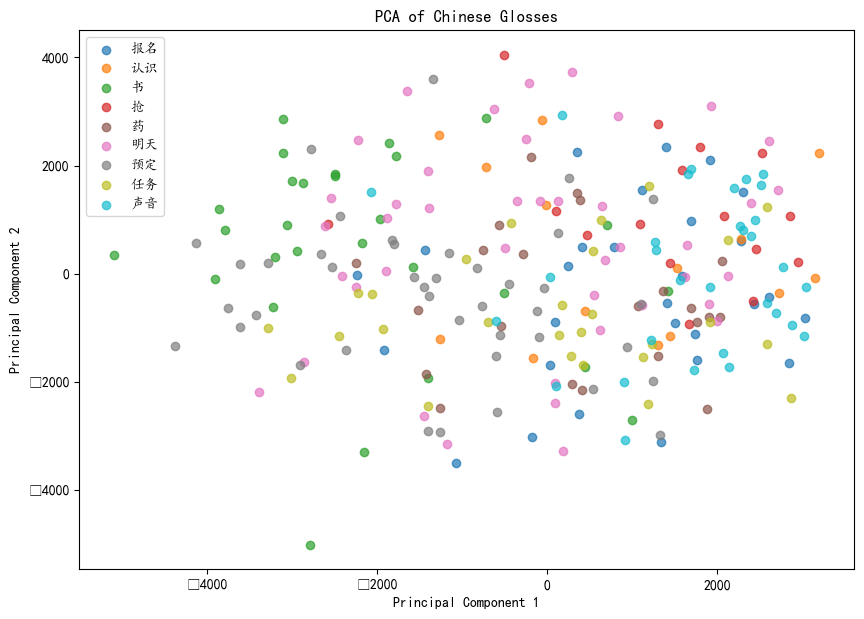

In [53]:
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import matplotlib
print(matplotlib.matplotlib_fname())
import matplotlib
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[f for f in matplotlib.font_manager.fontManager.ttflist if 'KaiTi' in f.name]
matplotlib.rcParams['font.family'] = ['KaiTi']

def plot_pca_for_glosses(combined_gloss, n_components=2):
    """
    Perform PCA on the given data dictionary and plot the results.

    Parameters:
    - data: A dictionary where keys are glosses (Chinese terms) and values are lists of tensors.
    - n_components: Number of principal components to retain for visualization (default is 2).
    """
    # Prepare the data: flatten tensors and collect corresponding labels
    X = []
    labels = []
    # Randomly sample gloss keys
    sampled_keys = random.sample(list(combined_gloss.keys()), 9)

    # Create a new dictionary with the sampled glosses
    combined_gloss = {key: combined_gloss[key] for key in sampled_keys}

    for i , (gloss, tensor_groups) in enumerate(combined_gloss.items()):
        #if i==10: break 
        for group in tensor_groups:
            for tensor in group:
                X.append(tensor.flatten())  # Flatten the tensor to 1D
                labels.append(gloss)  # Store corresponding gloss label

    X = np.array(X)

    # Perform PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Plot the PCA result
    plt.figure(figsize=(10, 7))
    
    # Assign colors to each unique gloss
    unique_labels = list(set(labels))
    colors = plt.cm.get_cmap('tab10', len(unique_labels))  # Use a color map for up to 10 glosses

    for i, gloss in enumerate(unique_labels):
        idx = [j for j, label in enumerate(labels) if label == gloss]
        plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=gloss, alpha=0.7, color=colors(i))

    plt.title('PCA of Chinese Glosses')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()


# Call the function
plot_pca_for_glosses(combined_gloss_dict)


In [81]:
## Using cosine similarity to check if the gloss have similar embeddings
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def compute_cosine_similarity(tokens):
    """
    Compute the cosine similarity between all pairs of tokens.
    tokens would be the dictionary value where the key is the gloss of the combined_gloss_dict

    Parameters:
    - tokens: A list or numpy array of shape (32, embedding_dim) where each row is a token embedding.

    Returns:
    - A matrix of cosine similarity scores.
    """
    # Compute pairwise cosine similarity
    
    tokens = np.array(tokens)
    print(tokens.shape)
    tokens = tokens.squeeze()
    similarity_matrix = cosine_similarity(tokens)
    # Extract the upper triangular part without the diagonal
    upper_triangular = np.triu(similarity_matrix, k=1)  # k=1 excludes diagonal
    # Calculate the mean of non-zero elements (i.e., off-diagonal similarities)
    mean_sim = np.sum(upper_triangular) / np.count_nonzero(upper_triangular)
    print(f"Mean cosine similarity: {mean_sim:.4f}")
    # Display the similarity matrix
    print("Cosine Similarity Matrix:")
    print(similarity_matrix)
        
    return similarity_matrix, mean_sim 

# Example usage:
# Assuming `tokens` is a numpy array of shape (32, embedding_dim)

similarity_matrix = compute_cosine_similarity(test_tokens)



(1, 29, 32)
Mean cosine similarity: 0.7991
Cosine Similarity Matrix:
[[1.         0.7572491  0.80754951 0.7691182  0.83122438 0.88378336
  0.84317241 0.68709101 0.88429572 0.77414768 0.87011182 0.87761044
  0.74787559 0.7827393  0.80450507 0.72743946 0.82660728 0.76249877
  0.81662792 0.85085001 0.7955651  0.87664777 0.77526077 0.76983906
  0.7774101  0.90603205 0.8197187  0.72192034 0.76162162]
 [0.7572491  1.         0.77146539 0.80491675 0.8320481  0.8196899
  0.80519326 0.6547785  0.8208083  0.75014723 0.79696103 0.75990657
  0.79508885 0.82553255 0.86981181 0.77042267 0.72957374 0.84285233
  0.78508118 0.76195557 0.80238254 0.775177   0.80710696 0.79292751
  0.77275743 0.78314124 0.71123139 0.85352688 0.7991068 ]
 [0.80754951 0.77146539 1.         0.82640926 0.85549118 0.8393771
  0.85017712 0.76179315 0.85866301 0.7289829  0.83414127 0.84535939
  0.78956289 0.71074624 0.88698614 0.76059649 0.78585296 0.80530914
  0.79814901 0.76771027 0.75532893 0.79519134 0.73178254 0.7316487
  

In [80]:
test_tokens = np.concatenate((np.array(combined_gloss_dict['信息']), np.array(combined_gloss_dict['一般'])), 1)

### After LLM adaptor

''